In [43]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [44]:
# Read the RGB image
image = cv2.imread('/content/images.jfif')
image = image.astype('float32') / 255.0
image = cv2.resize(image,(500,500))
# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

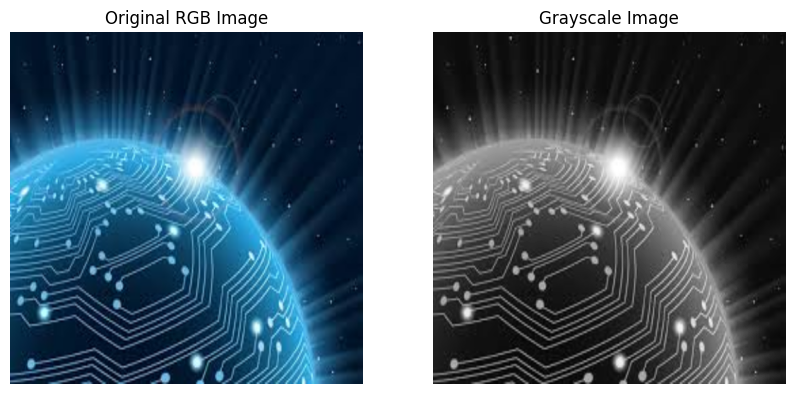

In [45]:
# Visualize the original and grayscale image
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original RGB Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.show()

In [46]:
def add_gaussian_noise(image, noise_factor=0.05):
    noisy_image = np.clip(image + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=image.shape), 0.0, 1.0)
    return noisy_image

In [47]:
def add_salt_and_pepper_noise(image, noise_factor=0.05):
    noisy_image = np.copy(image)
    salt_and_pepper = np.random.rand(*image.shape) < noise_factor
    noisy_image[salt_and_pepper] = 0 if np.random.rand() < 0.5 else 1
    return noisy_image

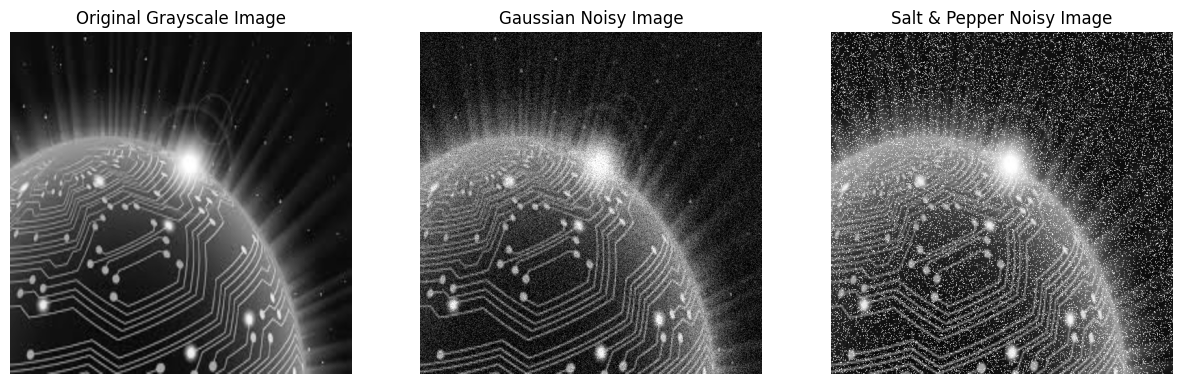

In [48]:
# Add Gaussian noise to the grayscale image
noisy_image_gaussian = add_gaussian_noise(gray_image, noise_factor=0.1)

# Add salt and pepper noise to the grayscale image
noisy_image_salt_pepper = add_salt_and_pepper_noise(gray_image, noise_factor=0.1)

# Visualize the noisy images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(noisy_image_gaussian, cmap='gray')
plt.title('Gaussian Noisy Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(noisy_image_salt_pepper, cmap='gray')
plt.title('Salt & Pepper Noisy Image')
plt.axis('off')

plt.show()


In [49]:
def apply_mean_filter(image, kernel_size=3):
    return cv2.blur(image, (kernel_size, kernel_size))

# Apply mean filter to remove Gaussian noise
denoised_gaussian = apply_mean_filter(noisy_image_gaussian)

# Apply mean filter to remove salt and pepper noise
denoised_salt_pepper = apply_mean_filter(noisy_image_salt_pepper)


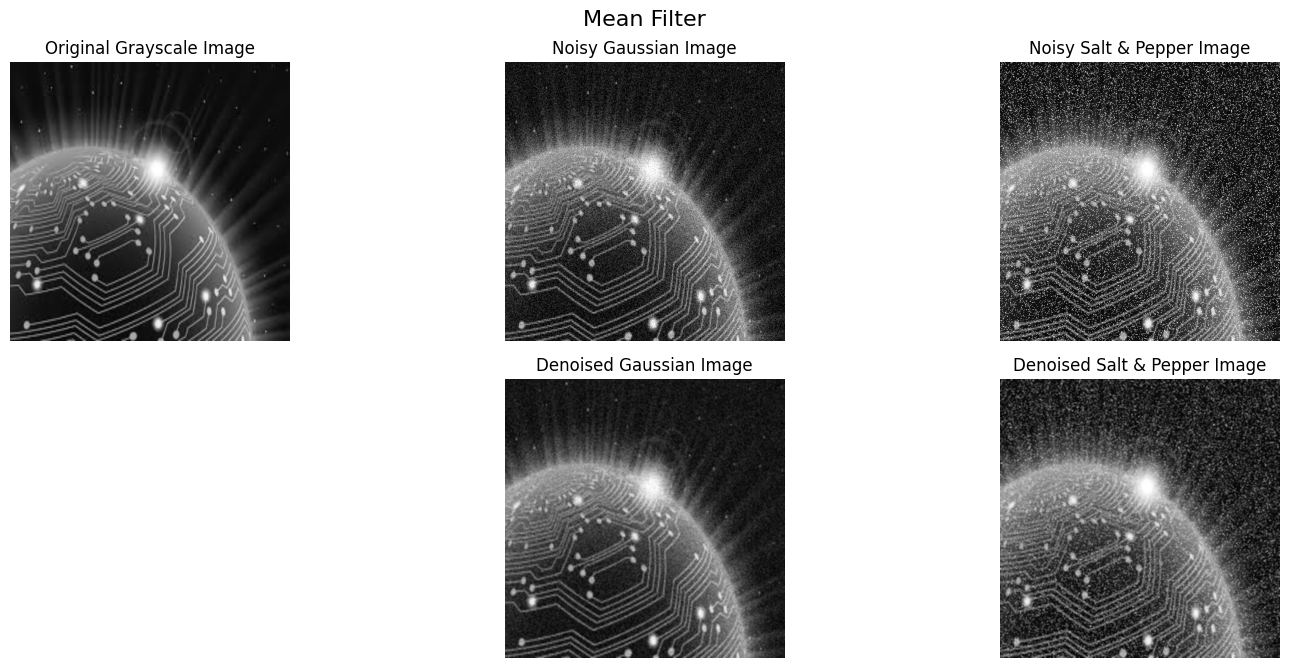

In [50]:
# Visualize the noisy and denoised images
plt.figure(figsize=(15, 10))

# Whole title
plt.suptitle('Mean Filter', fontsize=16)

# Original Grayscale Image
plt.subplot(3, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

# Noisy Gaussian Image
plt.subplot(3, 3, 2)
plt.imshow(noisy_image_gaussian, cmap='gray')
plt.title('Noisy Gaussian Image')
plt.axis('off')

# Noisy Salt & Pepper Image
plt.subplot(3, 3, 3)
plt.imshow(noisy_image_salt_pepper, cmap='gray')
plt.title('Noisy Salt & Pepper Image')
plt.axis('off')

# Denoised Gaussian Image
plt.subplot(3, 3, 5)
plt.imshow(denoised_gaussian, cmap='gray')
plt.title('Denoised Gaussian Image')
plt.axis('off')

# Denoised Salt & Pepper Image
plt.subplot(3, 3, 6)
plt.imshow(denoised_salt_pepper, cmap='gray')
plt.title('Denoised Salt & Pepper Image')
plt.axis('off')
plt.tight_layout()
plt.show()


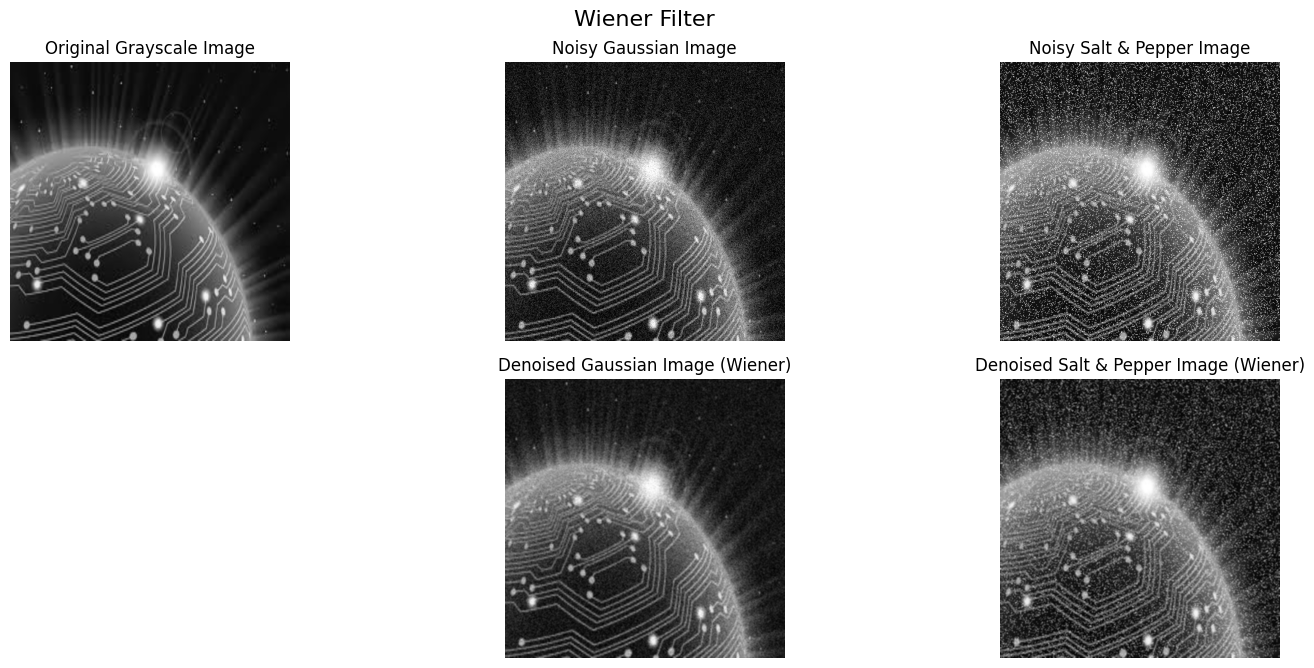

In [51]:
def apply_weiner_filter(image, kernel_size=3):
    return cv2.filter2D(image, -1, np.ones((kernel_size, kernel_size), np.float32)/(kernel_size*kernel_size))

# Apply Wiener filter to denoise Gaussian noisy image
denoised_weiner_gaussian = apply_weiner_filter(noisy_image_gaussian)

# Apply Wiener filter to denoise Salt & Pepper noisy image
denoised_weiner_salt_pepper = apply_weiner_filter(noisy_image_salt_pepper)

# Visualize the noisy and denoised images
plt.figure(figsize=(15, 10))

# Whole title
plt.suptitle('Wiener Filter', fontsize=16)

# Original Grayscale Image
plt.subplot(3, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

# Noisy Gaussian Image
plt.subplot(3, 3, 2)
plt.imshow(noisy_image_gaussian, cmap='gray')
plt.title('Noisy Gaussian Image')
plt.axis('off')

# Noisy Salt & Pepper Image
plt.subplot(3, 3, 3)
plt.imshow(noisy_image_salt_pepper, cmap='gray')
plt.title('Noisy Salt & Pepper Image')
plt.axis('off')

# Denoised Gaussian Image using Wiener filter
plt.subplot(3, 3, 5)
plt.imshow(denoised_weiner_gaussian, cmap='gray')
plt.title('Denoised Gaussian Image (Wiener)')
plt.axis('off')

# Denoised Salt & Pepper Image using Wiener filter
plt.subplot(3, 3, 6)
plt.imshow(denoised_weiner_salt_pepper, cmap='gray')
plt.title('Denoised Salt & Pepper Image (Wiener)')
plt.axis('off')
plt.tight_layout()
plt.show()


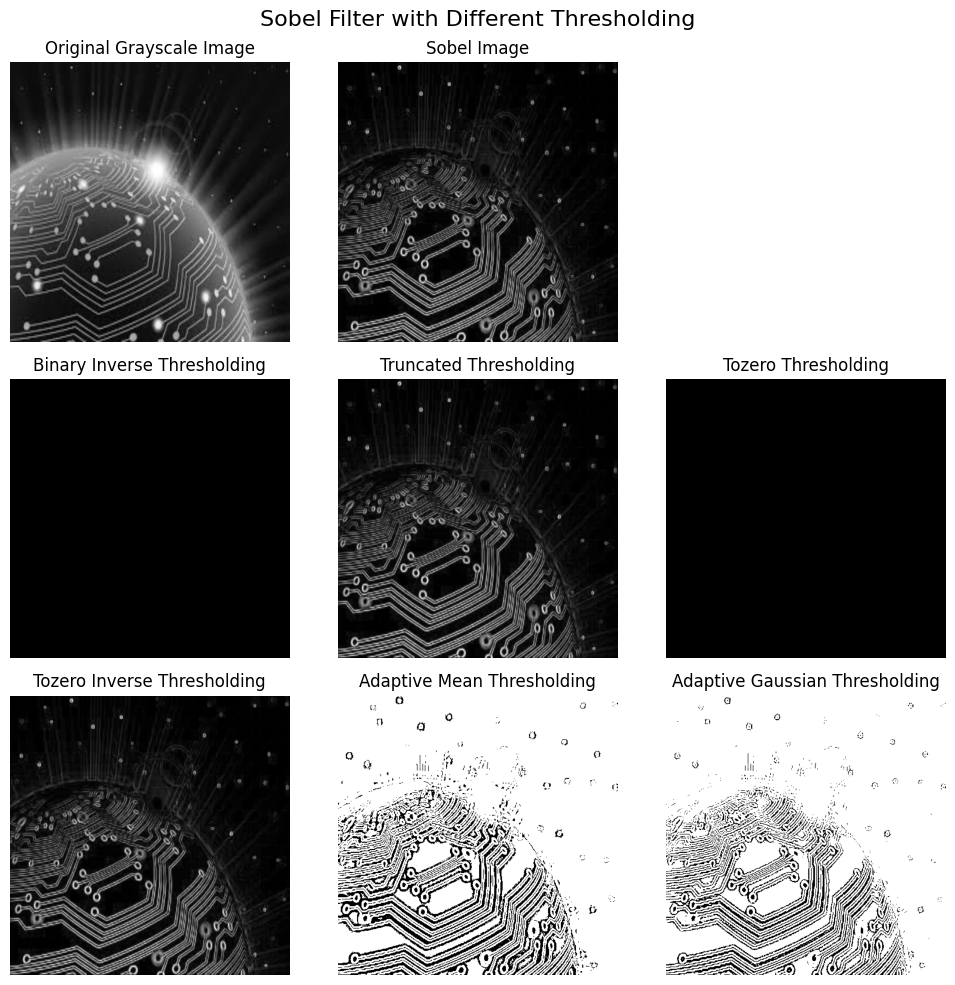

In [52]:
# Apply Sobel filter
sobelx = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=5)
sobel = np.sqrt(sobelx**2 + sobely**2)

# Thresholding
_, sobel_binary_inv = cv2.threshold(sobel, 100, 255, cv2.THRESH_BINARY_INV)
_, sobel_trunc = cv2.threshold(sobel, 100, 255, cv2.THRESH_TRUNC)
_, sobel_tozero = cv2.threshold(sobel, 100, 255, cv2.THRESH_TOZERO)
_, sobel_tozero_inv = cv2.threshold(sobel, 100, 255, cv2.THRESH_TOZERO_INV)

# Adaptive Thresholding
sobel_adaptive_mean = cv2.adaptiveThreshold(sobel.astype(np.uint8),255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
sobel_adaptive_gaussian = cv2.adaptiveThreshold(sobel.astype(np.uint8),255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)

# Visualize the results
plt.figure(figsize=(10, 10))

# Whole title
plt.suptitle('Sobel Filter with Different Thresholding', fontsize=16)

# Original Grayscale Image
plt.subplot(3, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

# Sobel Image
plt.subplot(3, 3, 2)
plt.imshow(sobel, cmap='gray')
plt.title('Sobel Image')
plt.axis('off')

# Sobel Binary Inverse Thresholding
plt.subplot(3, 3, 4)
plt.imshow(sobel_binary_inv, cmap='gray')
plt.title('Binary Inverse Thresholding')
plt.axis('off')

# Sobel Truncated Thresholding
plt.subplot(3, 3, 5)
plt.imshow(sobel_trunc, cmap='gray')
plt.title('Truncated Thresholding')
plt.axis('off')

# Sobel Tozero Thresholding
plt.subplot(3, 3, 6)
plt.imshow(sobel_tozero, cmap='gray')
plt.title('Tozero Thresholding')
plt.axis('off')

# Sobel Tozero Inverse Thresholding
plt.subplot(3, 3, 7)
plt.imshow(sobel_tozero_inv, cmap='gray')
plt.title('Tozero Inverse Thresholding')
plt.axis('off')

# Adaptive Mean Thresholding
plt.subplot(3, 3, 8)
plt.imshow(sobel_adaptive_mean, cmap='gray')
plt.title('Adaptive Mean Thresholding')
plt.axis('off')

# Adaptive Gaussian Thresholding
plt.subplot(3, 3, 9)
plt.imshow(sobel_adaptive_gaussian, cmap='gray')
plt.title('Adaptive Gaussian Thresholding')
plt.axis('off')
plt.tight_layout()
plt.show()
